# Analysis of dataset and feature extraction

This notebook contains the analysis of the dataset and extraction of features from the dataset. The dataset contains code snippets and their corresponding docstrings. 
Analysis of the dataset includes:
- Number of samples
- Number of tokens in code and docstrings
- Distribution of samples per programming language
- Distribution of samples per repository
- Distribution of code and docstring tokens
- Most common words in docstrings
- Most common keywords in code snippets

Author: Matej Vadovic

Year: 2024



In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_parquet('dataset-all-features.parquet')

In [3]:
stats = {
    '# of samples': {},
    '# of tokens(M)': {},
    'avg tokens': {},
    'std tokens': {},
    'median tokens': {},
    'modus tokens': {}
}
for stat, i in zip(['code_tokens_len', 'docstring_tokens_len'], range(2)):
    # Count total number of samples
    stats['# of samples'][i] = len(df)
    # Count total number of tokens
    stats['# of tokens(M)'][i] = (df[stat].sum()/1000000).round(2)
    # Average number of tokens
    stats['avg tokens'][i] = df[stat].mean().round(2)
    # Standard deviation of tokens
    stats['std tokens'][i] = df[stat].std().round(2)
    # Median number of tokens
    stats['median tokens'][i] = df[stat].median().round(2)
    # Modus number of tokens
    stats['modus tokens'][i] = df[stat].mode()[0].round(2)

stats_df = pd.DataFrame(stats)
stats_df

,# of samples,# of tokens(M),avg tokens,std tokens,median tokens,modus tokens
0,50241,5.23,104.13,64.20,92.0,22
1,50241,1.30,25.81,16.74,20.0,13


In [4]:
print(f"Number of examples per programming language:")
# Pivot table
pivot = df.groupby('language')['code_tokens_len'].count().reset_index().rename(columns={'code_tokens_len': 'count'})
pivot

Number of examples per programming language:


,language,count
0,C,65
1,C++,50176


In [5]:
print(f'Number of examples per repository:')
# Pivot table
pivot = df.groupby('repository')['code_tokens_len'].count().reset_index().rename(columns={'code_tokens_len': 'count'})
pivot

Number of examples per repository:


,repository,count
0,AliOS-Things,978
1,Avem,235
2,DAPLink,392
3,DreamShell,383
4,ESF,101
5,EVAL-ADICUP3029,300
6,EmbeddedLapack,104
7,FreeModbus_Slave-Master-RTT-STM32,100
8,LPC11U_LPC13U_CodeBase,106
9,LPC1343CodeBase,177


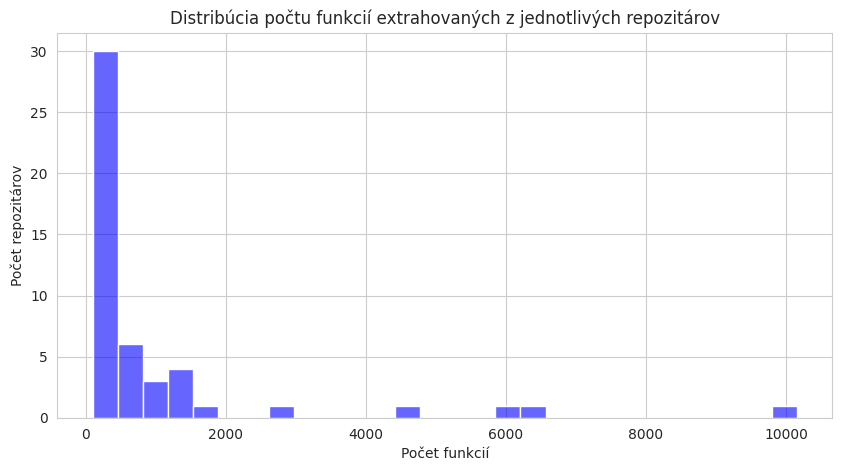

In [6]:
# Use a symple style without grod
sns.set_style('whitegrid')

# Plot the distribution of the number of examples per repository
plt.figure(figsize=(10, 5))
sns.histplot(pivot['count'], color='blue', alpha=0.6)
plt.xlabel('Počet funkcií')
plt.ylabel('Počet repozitárov')
plt.title('Distribúcia počtu funkcií extrahovaných z jednotlivých repozitárov')
plt.show()

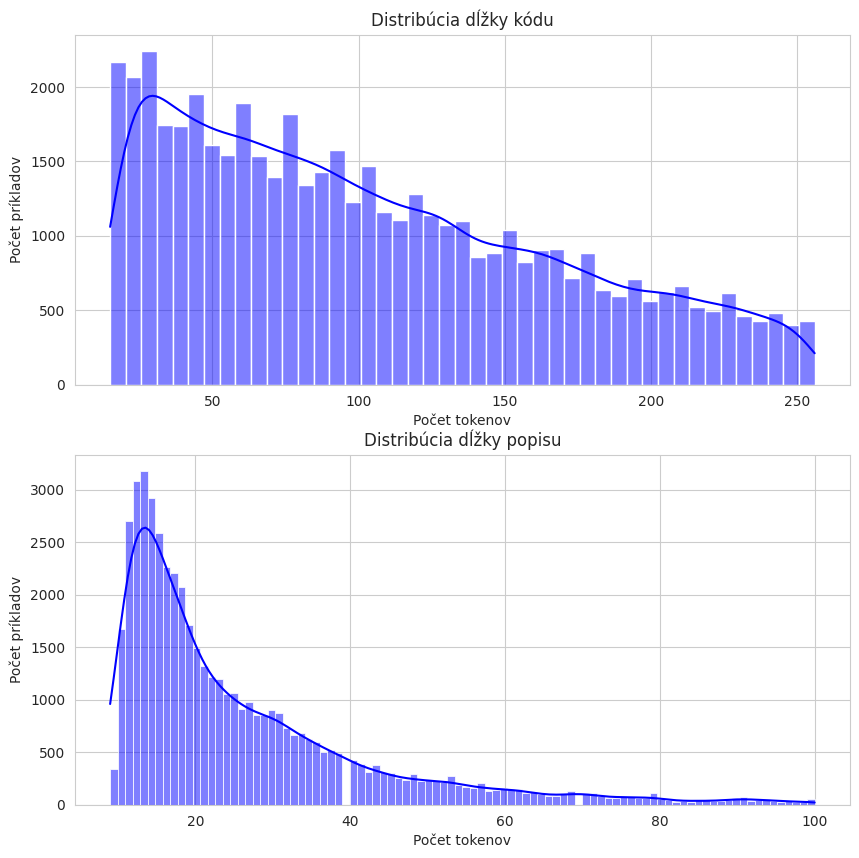

In [7]:
code_tokens = df['code_tokens_len']
docstring_tokens = df['docstring_tokens_len']
input_lengths = df['code_tokens_len'] + df['docstring_tokens_len']
 
# Plot 3 histograms
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for ax, data, title in zip(axs, [code_tokens, docstring_tokens], ['Distribúcia dĺžky kódu', 'Distribúcia dĺžky popisu']):
    # make kde with red line
    sns.histplot(data, kde=True, color='blue', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Počet tokenov')
    ax.set_ylabel('Počet príkladov')

## Keyword distribution in the dataset code snippets

Extraction of keywords from code snippets is a common task in code analysis. This can be useful too understand common patterns in the code and assess the complexity of code snippets.

Source of keywords in C++: https://en.cppreference.com/w/cpp/keyword

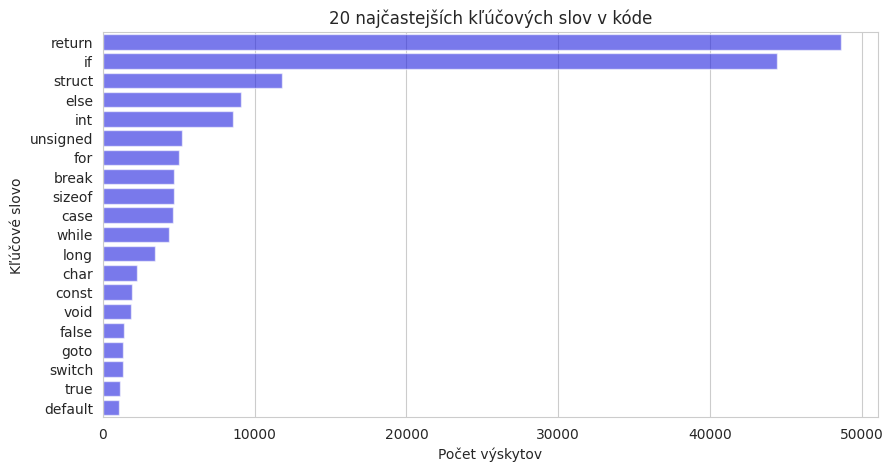

In [8]:
cpp_keywords = [
    "alignas", "alignof", "and", "and_eq", "asm", "atomic_cancel",
    "atomic_commit", "atomic_noexcept", "auto", "bitand", "bitor",
    "bool", "break", "case", "catch", "char", "char8_t", "char16_t",
    "char32_t", "class", "compl", "concept", "const", "consteval",
    "constexpr", "constinit", "const_cast", "continue", "co_await",
    "co_return", "co_yield", "decltype", "default", "delete", "do",
    "double", "dynamic_cast", "else", "enum", "explicit", "export",
    "extern", "false", "float", "for", "friend", "goto", "if",
    "inline", "int", "long", "mutable", "namespace", "new", "noexcept",
    "not", "not_eq", "nullptr", "operator", "or", "or_eq", "private",
    "protected", "public", "reflexpr", "register", "reinterpret_cast",
    "requires", "return", "short", "signed", "sizeof", "static",
    "static_assert", "static_cast", "struct", "switch", "synchronized",
    "template", "this", "thread_local", "throw", "true", "try",
    "typedef", "typeid", "typename", "union", "unsigned", "using",
    "virtual", "void", "volatile", "wchar_t", "while", "xor", "xor_eq"
]

# Count number of keywords in the code
def get_most_common_keywords(texts, keywords):
    words = {}
    for text in texts:
        # Find all keywords in the text
        tokens = re.findall(r'\b\w+\b', text)
        for token in tokens:
            if token in keywords:
                if token in words:
                    words[token] += 1
                else:
                    words[token] = 1
    words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)}
    return words

most_common_keywords = get_most_common_keywords(df['code'], cpp_keywords)

df_tokens = pd.DataFrame(most_common_keywords.items(), columns=['Keyword', 'Count'])


# Plot the most common words
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Keyword', data=df_tokens.head(20), color='blue', alpha=0.6)
plt.xlabel('Počet výskytov')
plt.ylabel('Kľúčové slovo')
plt.title('20 najčastejších kľúčových slov v kóde')
plt.show()